In [1]:
! git lfs install

! git clone https://github.com/timojl/clipseg

! pip install diffusers -q

! pip install transformers -q -UU ftfy gradio

! pip install git+https://github.com/openai/CLIP.git -q

Git LFS initialized.
Cloning into 'clipseg'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 232 (delta 72), reused 58 (delta 58), pack-reused 147
Receiving objects: 100% (232/232), 1.40 MiB | 15.93 MiB/s, done.
Resolving deltas: 100% (126/126), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 930.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [10]:
!wget https://owncloud.gwdg.de/index.php/s/ioHbRzFx6th32hn/download -O weights.zip
!unzip -d weights -j weights.zip

--2024-06-27 03:43:32--  https://owncloud.gwdg.de/index.php/s/ioHbRzFx6th32hn/download
Resolving owncloud.gwdg.de (owncloud.gwdg.de)... 134.76.23.45
Connecting to owncloud.gwdg.de (owncloud.gwdg.de)|134.76.23.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘weights.zip’

weights.zip             [     <=>            ]   9.68M   403KB/s    in 48s     

2024-06-27 03:44:22 (205 KB/s) - ‘weights.zip’ saved [10146905]

Archive:  weights.zip
 extracting: weights/rd16-uni.pth    
 extracting: weights/rd64-uni-refined.pth  
 extracting: weights/rd64-uni.pth    


In [11]:
%cd clipseg

[Errno 2] No such file or directory: 'clipseg'
/content/clipseg


In [12]:
! ls

clip_masking_lvis_image_ids.yml  LICENSE		  score.py
datasets			 metrics.py		  setup.py
environment.yml			 models			  supplementary.pdf
evaluation_utils.py		 overview.png		  Tables.ipynb
example_image.jpg		 Quickstart.ipynb	  training.py
experiments			 README.md		  Visual_Feature_Engineering.ipynb
general_utils.py		 sample_rd64.png	  weights
__init__.py			 sample_rd64_refined.png  weights.zip


In [13]:
import torch
import requests
import cv2
from models.clipseg import CLIPDensePredT
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

In [14]:
from io import BytesIO

from torch import autocast
import requests
import PIL
import torch
from diffusers import StableDiffusionInpaintPipeline as StableDiffusionInpaintPipeline

In [15]:
#! git lfs install

In [16]:
# load model
model = CLIPDensePredT(version='ViT-B/16', reduce_dim=64)
model.eval();


In [17]:
# non-strict, because we only stored decoder weights (not CLIP weights)
model.load_state_dict(torch.load('/content/clipseg/weights/rd64-uni.pth', map_location=torch.device('cuda')), strict=False);


In [18]:
device = "cuda"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    torch_dtype=torch.float16,
    use_auth_token=True
).to(device)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:783: FutureWarning: You are using a legacy checkpoint for inpainting with Stable Diffusion, therefore we are loading the <class 'diffusers.pipelines.deprecated.stable_diffusion_variants.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> class instead of <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint.StableDiffusionInpaintPipeline'>. For better inpainting results, we strongly suggest using Stable Diffusion's official inpainting checkpoint: https://huggingface.co/runwayml/stable-diffusion-inpainting instead or adapting your checkpoint CompVis/stable-diffusion-v1-4 to the format of https://huggingface.co/runwayml/stable-diffusion-inpainting. Note that we do not actively maintain the {StableDiffusionInpaintPipelineLegacy} class and will likely remove it in version 1.0.0.
  deprecate("StableDiffusionInpaintPipelineLegacy", "1.0.0", deprecation_message, s

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--

In [19]:
# or load from URL...
image_url = 'https://okmagazine.ge/wp-content/uploads/2021/04/00-promo-rob-pattison-1024x1024.jpg' #'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimage.tmdb.org%2Ft%2Fp%2Foriginal%2F72xYNWRTVMDiKVa6SVu6EY0S9Np.jpg' #'https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png'
input_image = Image.open(requests.get(image_url, stream=True).raw)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((512, 512)),
])
img = transform(input_image).unsqueeze(0)

In [20]:
%cd ..

/content


In [21]:
input_image.convert("RGB").resize((512, 512)).save("init_image.png", "PNG")

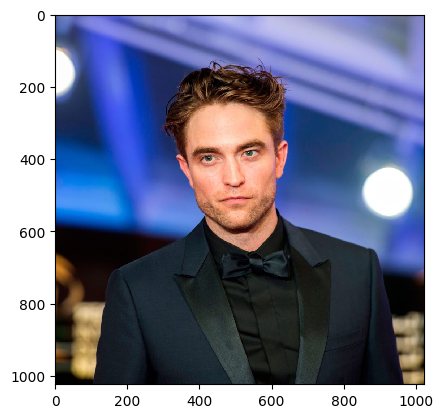

In [22]:
from matplotlib import pyplot as plt
plt.imshow(input_image, interpolation='nearest')
plt.show()

In [23]:
prompts = ['shirt']

In [24]:

# predict
with torch.no_grad():
    preds = model(img.repeat(len(prompts),1,1,1), prompts)[0]


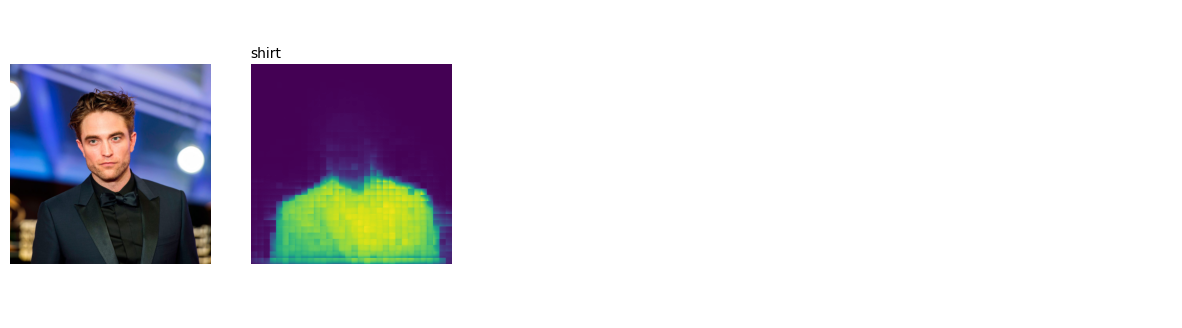

In [25]:
# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(input_image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))];
[ax[i+1].text(0, -15, prompts[i]) for i in range(len(prompts))];

In [26]:
filename = f"mask.png"
plt.imsave(filename,torch.sigmoid(preds[0][0]))

In [27]:
img2 = cv2.imread(filename)

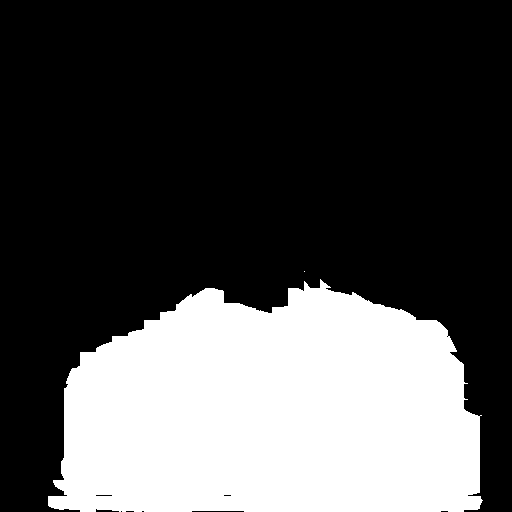

In [28]:
img2 = cv2.imread(filename)

gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

(thresh, bw_image) = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

# For debugging only:
cv2.imwrite(filename,bw_image)

# fix color format
cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)

Image.fromarray(bw_image)

In [29]:
init_image = Image.open('init_image.png')
mask = Image.open('mask.png')

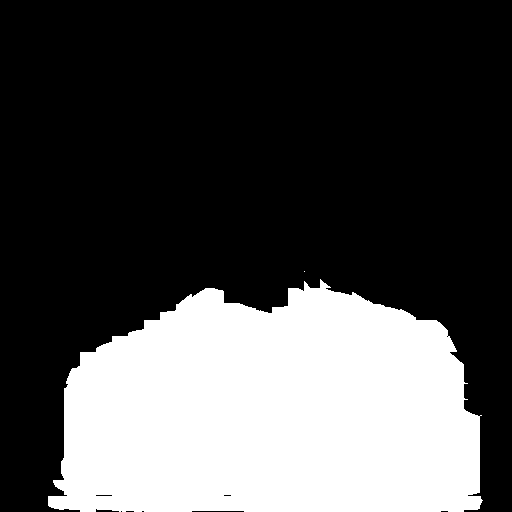

In [30]:
mask

In [32]:
with autocast("cuda"):
    output = pipe(prompt="a pink floral holiday casual shirt", image=init_image, mask_image=mask, strength=0.8)


  0%|          | 0/40 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


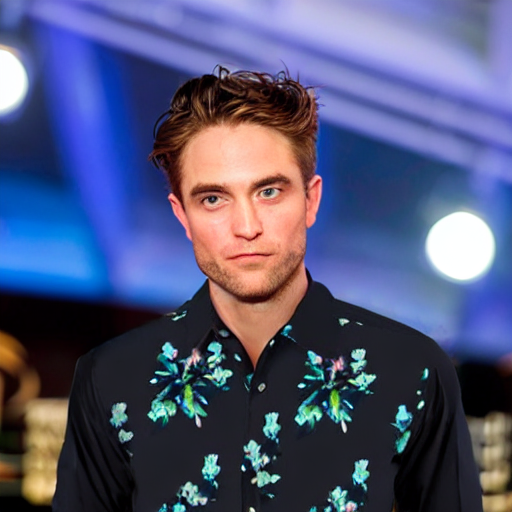

In [34]:
output.images[0]


# Web UI

In [35]:
import gradio as gr

In [43]:
def prompt_paint(input_image, source_prompt, result_prompt):

  #input_image = Image.open(requests.get(image_url, stream=True).raw)

  transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
      transforms.Resize((512, 512)),
  ])

  img = transform(input_image).unsqueeze(0)

  prompts = [source_prompt]

  # predict
  with torch.no_grad():
      preds = model(img.repeat(len(prompts),1,1,1), prompts)[0]


  input_image.convert('RGB').resize((512, 512)).save("init_image.png", "PNG")


  filename = f"mask.png"

  plt.imsave(filename,torch.sigmoid(preds[0][0]))

  img2 = cv2.imread(filename)

  gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

  (thresh, bw_image) = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

  # For debugging only:
  cv2.imwrite(filename,bw_image)

  # fix color format
  cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)

  Image.fromarray(bw_image)

  init_image = Image.open('init_image.png')
  mask = Image.open('mask.png')

  with autocast("cuda"):
    output = pipe(prompt = result_prompt, image=init_image, mask_image=mask, strength=0.8)

  return(output.images[0])


In [46]:
def prompt_paint_advanced(input_image, source_prompt, result_prompt, mask_precision, sd_strength):

  #input_image = Image.open(requests.get(image_url, stream=True).raw)

  transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
      transforms.Resize((512, 512)),
  ])

  img = transform(input_image).unsqueeze(0)

  prompts = [source_prompt]

  # predict
  with torch.no_grad():
      preds = model(img.repeat(len(prompts),1,1,1), prompts)[0]


  input_image.convert('RGB').resize((512, 512)).save("init_image.png", "PNG")


  filename = f"mask.png"

  plt.imsave(filename,torch.sigmoid(preds[0][0]))

  img2 = cv2.imread(filename)

  gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

  (thresh, bw_image) = cv2.threshold(gray_image, mask_precision, 255, cv2.THRESH_BINARY)

  # For debugging only:
  cv2.imwrite(filename,bw_image)

  # fix color format
  cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)

  Image.fromarray(bw_image)

  init_image = Image.open('init_image.png')
  mask = Image.open('mask.png')

  with autocast("cuda"):
    output = pipe(prompt = result_prompt, image=init_image, mask_image=mask, strength=sd_strength)

  return(output.images[0])


In [47]:
with gr.Blocks() as demo:
    gr.Markdown("# Prompt Paint - Stable Diffusion")
    with gr.Tab("Prompt Paint - Basic"):
        with gr.Row():


            input_image = gr.Image(label = 'Upload your input image', type = 'pil')

            source_prompt = gr.Textbox(label="What is in the input image you want to change?")
            result_prompt = gr.Textbox(label="Replace it with?")

            image_output = gr.Image()

        image_button = gr.Button("Generate")

        image_button.click(prompt_paint, inputs=[input_image, source_prompt, result_prompt ], outputs=image_output)

    with gr.Tab("Prompt Paint - Advanced"):
        with gr.Row():


            input_image = gr.Image(label = 'Upload your input image', type = 'pil')

            source_prompt = gr.Textbox(label="What is in the input image you want to change?")
            result_prompt = gr.Textbox(label="Replace it with?")


            mask_precision = gr.Slider(minimum = 50, maximum = 255, value = 70, label = 'Mask Precision')

            sd_strength = gr.Slider(minimum = 0, maximum = 1, value = 0.8, step = 0.1, label = 'Stable Diffusion Strength')


            image_output = gr.Image()

        image_button_advanced = gr.Button("Generate")

        image_button_advanced.click(prompt_paint_advanced, inputs=[input_image, source_prompt, result_prompt, mask_precision, sd_strength ], outputs=image_output)

demo.launch(debug = True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://d925a5a71af9cc0df1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


  0%|          | 0/40 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


  0%|          | 0/40 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d925a5a71af9cc0df1.gradio.live
